<a href="https://colab.research.google.com/github/tumblinger/Data_Visualization_in_Python/blob/main/Data_Visualization_w_Python_Course_8_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Part 1 - Group Activity - Basic Charts (Bar Chart)
In the activity, we are using a dataset that contains information on monthly income across different job roles, creating a visualization of the data using Bar Chart tool and various libraries/packages: matplotlib, seaborn, plotly. 







In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
import pandas as pd
df=pd.read_excel('HR_Analytics.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


This dataset provides a detailed examination of employee attrition and its contributing factors, providing a robust set of quantitative and qualitative data


The size of dataset:

In [3]:
df.shape

(1470, 35)

## Using Matplotlib:
Matplotlib is a simple and easy-to-use library that can create basic bar graphs quickly, but its default style is not very modern.

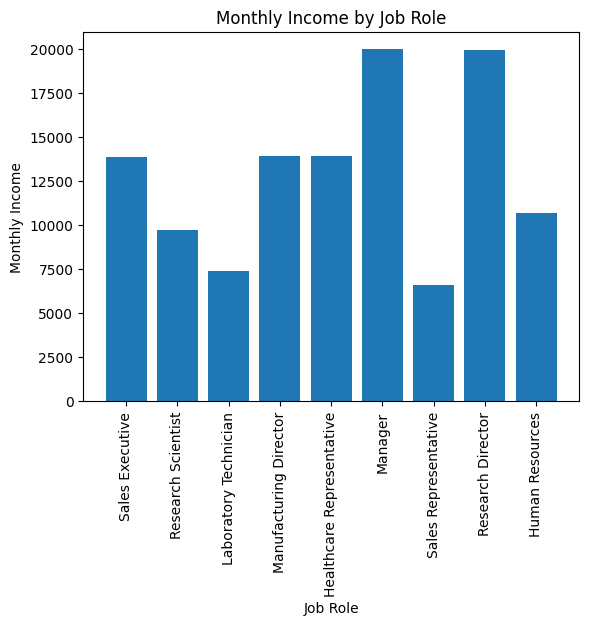

In [4]:
# Plot the data using bar() method
plt.bar(x = 'JobRole', height='MonthlyIncome', data=df)
plt.xticks(rotation=90)
plt.title("Monthly Income by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
  
# Show the plot
plt.show()


Create a chart based on grouping by Job role:

In [5]:
data_bar = df[['JobRole','MonthlyIncome']]
data_bar = data_bar.groupby(['JobRole'], as_index=False).mean()
data_bar

,JobRole,MonthlyIncome
0,Healthcare Representative,7528.763359
1,Human Resources,4235.750000
2,Laboratory Technician,3237.169884
3,Manager,17181.676471
4,Manufacturing Director,7295.137931
5,Research Director,16033.550000
6,Research Scientist,3239.972603
7,Sales Executive,6924.279141
8,Sales Representative,2626.000000


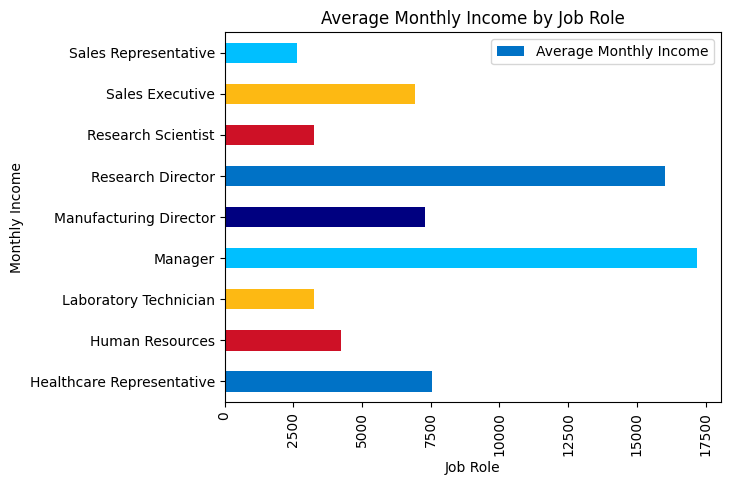

In [6]:
# Plot the data using bar() method

colors = ['#0072C6', '#CE1126', '#FDB913', '#00BFFF', '#000080']

data_bar.plot.barh(x = 'JobRole', y='MonthlyIncome', color=colors)
#plt.bar(x = 'JobRole', height='MonthlyIncome', data=data_bar)
plt.xticks(rotation=90)
plt.title("Average Monthly Income by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
plt.legend(['Average Monthly Income'])
  
# Show the plot
plt.show()

## Using Seaborn:

Seaborn provides more customization options and a more modern look than Matplotlib, making it a good choice if you want to create more polished and customized visualizations. Seaborn's barplot is also useful for exploring the distribution of a variable across different categories.

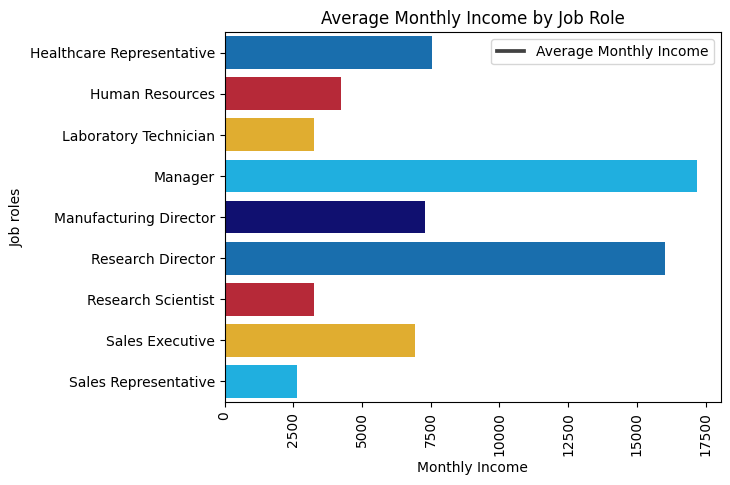

In [7]:


sns.barplot(y='JobRole', x='MonthlyIncome', data=data_bar, palette=colors)
plt.xticks(rotation=90)
#plt.errorbar(x, y, yerr=0, capsize=0)
plt.title('Average Monthly Income by Job Role')
plt.xlabel('Monthly Income')
plt.ylabel('Job roles')
plt.legend(['Average Monthly Income'])
plt.show()

## Using Plotly:
Plotly is an interactive library that allows users to create more complex and dynamic visualizations. It is a good choice if you want to create interactive and dynamic visualizations that can be easily shared and explored.

In [8]:
import plotly.express as px

fig = px.bar(data_bar, x='MonthlyIncome', y='JobRole', color='MonthlyIncome',
             color_discrete_sequence=colors, orientation='h', color_continuous_scale=px.colors.sequential.Magenta,
             labels={'MonthlyIncome': 'Average Monthly Income'})

fig.update_layout(title='Average Monthly Income by Job Role',
                   xaxis_title='Monthly Income',
                   yaxis_title='Job roles',
                  legend_title='Average Monthly Income')

fig.show()


**Summary**

---


### After comparing the 3 charts, the barchart using **Seaborn** is more visually appealing and easy to interpret data compared to Plotly and Matplotlib. Plotly is also a better choice compared to Matplotlib. The chart allows us to quickly see which job roles have higher or lower average incomes, and we can easily compare the incomes of different job roles.



> 











# Part 2 - Advanced Charts
In the same group, we are using the same datasets that you selected in Part 1, Waffle charts and Seaborn & Regression Plots that might be better for visualizing chosen dataset or would help tell the story hidden in the sample.




# Waffle Chart

In [9]:
%pip install pywaffle

from pywaffle import Waffle



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 71.6 MB/s eta 0:00:00


In [10]:

# Filter data to only include ManagerRole

data_waf = df[df['JobRole']=='Manager']
data_waf = data_waf[['EducationField','MonthlyIncome']]
data_waf = data_waf.groupby(['EducationField'], as_index=False).count()
data_waf.rename(columns={'MonthlyIncome': 'Number of Managers'}, inplace=True)
data_waf



,EducationField,Number of Managers
0,Human Resources,6
1,Life Sciences,40
2,Marketing,14
3,Medical,32
4,Other,5
5,Technical Degree,5


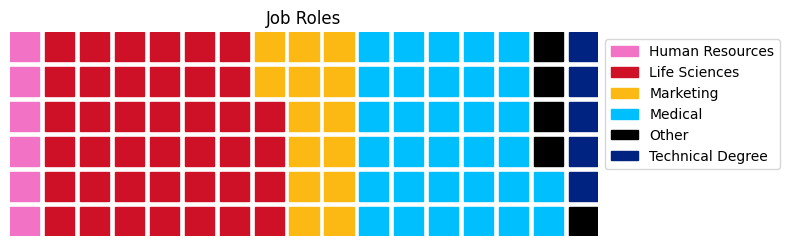

In [11]:
# create a waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=6,
    values=data_waf['Number of Managers'],
    labels=list(data_waf['EducationField']),
    figsize=(8, 6),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=['#F272C6', '#CE1126', '#FDB913', '#00BFFF', '#000000', '#002280']
)
plt.title('Job Roles')
plt.show()

## Summary: 
As shown in the Waffle chart, the majority of the people with manager roles came from the fields of Life Sciences and Medical.

# Regression Plot

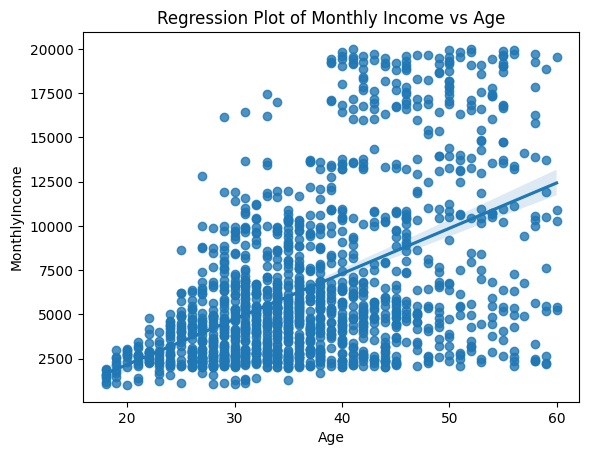

In [15]:
# Create the regression plot
sns.regplot(x='Age', y='MonthlyIncome', data=df)

# Add a title to the plot
plt.title('Regression Plot of Monthly Income vs Age')

# Display the plot
plt.show()

## Summary:
The regression line shows a positive relationship between the age and monthly income, which means that as the age increases, the MonthlyIncome tends to increase as well. However, there is some scatter around the regression line, indicating that the relationship is not perfectly linear, and there may be some other factors affecting the relationship between age and monthly income.